## Pumpkin Varieties and Color

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

Let's look at the relationship between color and variety

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
pumpkins = pd.read_csv('US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,Mostly High,Origin,Origin District,Item Size,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,280.0,MARYLAND,NaN,lge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,DELAWARE,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,160.0,VIRGINIA,NaN,med,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,100.0,MARYLAND,NaN,lge,ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [29]:
from sklearn.preprocessing import LabelEncoder

new_columns = ["Color", "Origin", "Item Size", "Variety", "City Name", "Package"]

new_pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis = 1)
new_pumpkins.dropna(inplace = True)
new_pumpkins = new_pumpkins.apply(LabelEncoder().fit_transform)
new_pumpkins["Price"] = (pumpkins["Low Price"] + pumpkins["High Price"])/2

In [11]:
new_pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Name  991 non-null    int64  
 1   Package    991 non-null    int64  
 2   Variety    991 non-null    int64  
 3   Origin     991 non-null    int64  
 4   Item Size  991 non-null    int64  
 5   Color      991 non-null    int64  
 6   Price      991 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 61.9 KB


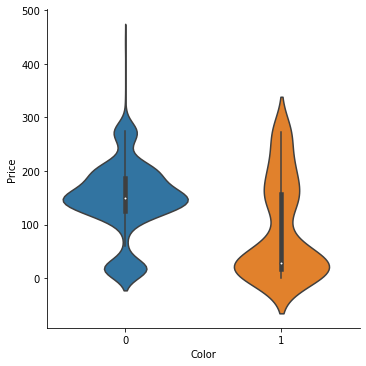

In [14]:
_ = sns.catplot(x="Color", y="Price", kind = "violin", data=new_pumpkins)

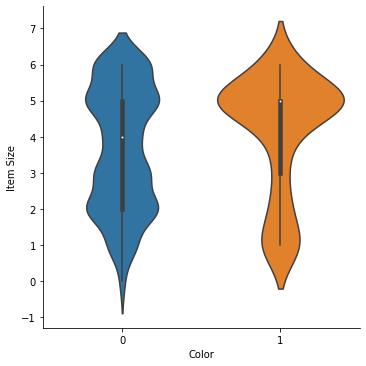

In [9]:
sns.catplot(x="Color", y="Item Size", kind = "violin", data=new_pumpkins)

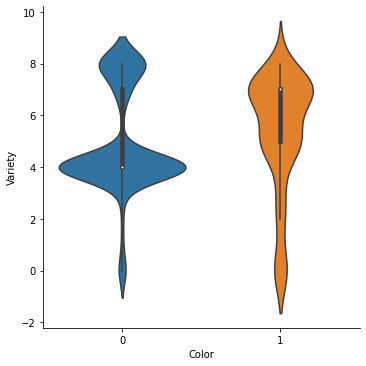

In [39]:
_ = sns.catplot(x="Color", y="Variety", kind = "violin", data=new_pumpkins)

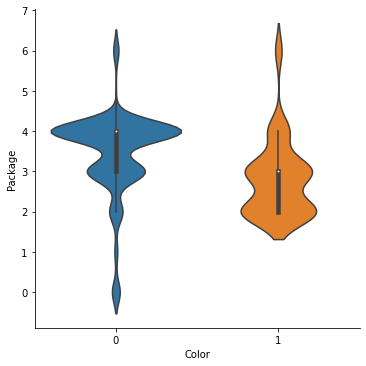

In [40]:
_ = sns.catplot(x="Color", y="Package", kind = "violin", data=new_pumpkins)

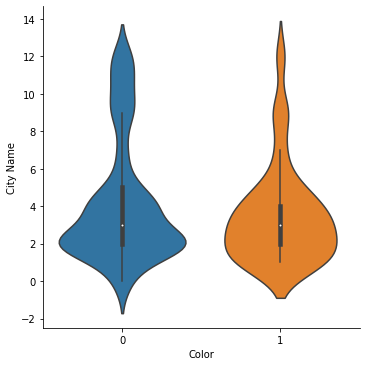

In [43]:
_ = sns.catplot(x="Color", y="City Name", kind = "violin", data=new_pumpkins)

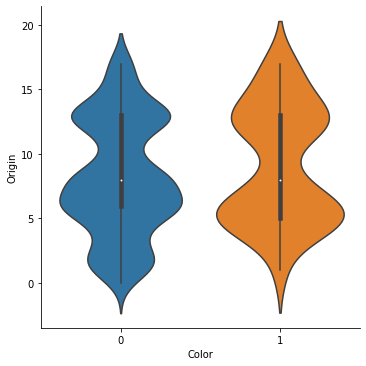

In [47]:
_ = sns.catplot(x="Color", y="Origin", kind = "violin", data=new_pumpkins)

Distributions of Price, Package and Variety look different for each color so, we  could use this features trying to make predictions of the colors of pumpkins

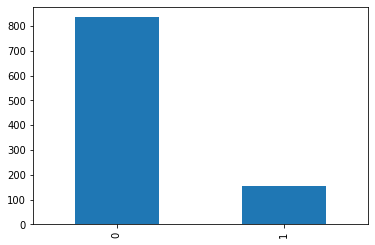

In [54]:
_ = new_pumpkins["Color"].value_counts().plot(kind="bar")

We observe that data is imbalaced so we would try to mitigate it interpolating features

In [133]:
features = ["Price", "Package"]
X = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in features], axis=1)
y = new_pumpkins[["Color"]]

Now we select the color feature as target and the others as predictor

In [158]:
from imblearn.over_sampling import  SMOTE
smote = SMOTE(k_neighbors=6)
X_, y_ = smote.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


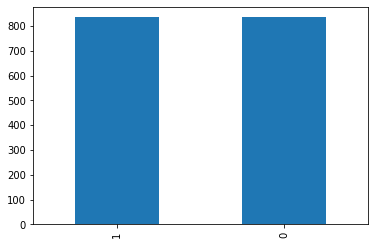

In [46]:
pd.Series(y_).value_counts().plot(kind = "bar")

Now we have balanced categories let proceed to train the model

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_,y_, train_size = 0.2, random_state = 0)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

print(classification_report(y_test, pred))
print(f"model acc: {accuracy_score(y_test.ravel(), pred)}")
print(f"predictions: {pred}")

              precision    recall  f1-score   support

           0       0.66      0.87      0.75       659
           1       0.81      0.57      0.67       677

    accuracy                           0.72      1336
   macro avg       0.74      0.72      0.71      1336
weighted avg       0.74      0.72      0.71      1336

model acc: 0.7155688622754491
predictions: [1 1 0 ... 0 1 1]


auc_score:0.7489392414539733


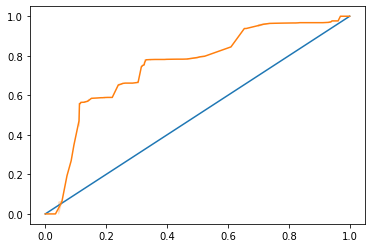

In [161]:
from sklearn.metrics import  roc_curve, roc_auc_score

y_scores = model.predict_proba(X_test)

fpr, tpr, tresholds = roc_curve(y_test, y_scores[:,1])
print(f"auc_score:{roc_auc_score(y_test, y_scores[:,1])}")
sns.lineplot(x=[0,1],y=[0,1])
_ = sns.lineplot(x=fpr, y=tpr)